In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/raw/ted_main.csv')
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


## Data cleaning

In [3]:
# check null values
data.isnull().sum(axis=0)

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [4]:
# some speakers' occupation is not recorded --> change to unknown
data.speaker_occupation.fillna('Unknown',inplace=True)
data.speaker_occupation.isnull().sum()

0

In [5]:
# convert datetime
data.published_date = pd.to_datetime(data.published_date,unit='s')
data.film_date = pd.to_datetime(data.film_date,unit='s')

In [6]:
# convert duration to minutes

data['duration'] = round(data['duration']/60,2)

## Rating Analysis

### Create Rating_df

In [7]:
import ast
data.ratings[:5]

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [8]:
# convert the string to the list with dict
data.ratings = data.ratings.map(ast.literal_eval)

In [9]:
# check all rating attributes
rating_attr = set()
for rating in data.ratings:
    rating_attr = rating_attr | set([r['name'] for r in rating])
rating_attr

{'Beautiful',
 'Confusing',
 'Courageous',
 'Fascinating',
 'Funny',
 'Informative',
 'Ingenious',
 'Inspiring',
 'Jaw-dropping',
 'Longwinded',
 'OK',
 'Obnoxious',
 'Persuasive',
 'Unconvincing'}

In [10]:
# create a rating df
rating_dict = {attr:[] for attr in rating_attr}
for rating in data.ratings:
    for r in rating:
        rating_dict[r['name']].append(r['count'])

In [11]:
# put in a df
rating_df = pd.DataFrame.from_dict(rating_dict)

In [12]:
# add URL as the identifier
rating_df['url'] = data['url']

In [13]:
rating_df.head()

,OK,Funny,Ingenious,Longwinded,Persuasive,Courageous,Jaw-dropping,Unconvincing,Inspiring,Informative,Fascinating,Beautiful,Obnoxious,Confusing,url
0,1174,19645,6073,387,10704,3253,4439,300,24924,7346,10581,4573,209,242,https://www.ted.com/talks/ken_robinson_says_sc...
1,203,544,56,113,268,139,116,258,413,443,132,58,131,62,https://www.ted.com/talks/al_gore_on_averting_...
2,146,964,183,78,230,45,54,104,230,395,166,60,142,27,https://www.ted.com/talks/david_pogue_says_sim...
3,85,59,105,53,460,760,230,36,1070,380,132,291,35,32,https://www.ted.com/talks/majora_carter_s_tale...
4,248,1390,3202,110,2542,318,3736,67,2893,5433,4606,942,61,72,https://www.ted.com/talks/hans_rosling_shows_t...


In [14]:
rating_df.to_csv('data/output/rating_df.csv',index=False)

### Create rating_ratio_df

In [15]:
rating_ratio_df = rating_df.iloc[:,:-1].div(rating_df.sum(axis=1),axis='rows')

In [16]:
rating_ratio_df['url'] = data['url']

In [17]:
rating_ratio_df.to_csv('data/output/rating_ratio_df.csv',index=False)

### Analysis

In [18]:
import seaborn as sns

#### Highest rating analysis

><b>Analysis:</b><br>
    From the results below, most talks are rated as Inspiring, followed by Informative and Fascinating. It is not surprising as the slogan of TED Talks is "ideas worth spreading", and the audience find the ideas conveyed in the talks inspiring, and find the talks informative and fascinating.<br><br>
    Moreover, the negative attributes, such as Obnoxious and Confusing, have the least number talks with them being the hightest rating. It shows that the quality of the TED Talks remain high throughout the years.  

In [19]:
# obtain the rating attribute with the most counts for each talk
# check the number of talks for each attribute 

highest_rating= rating_ratio_df.drop(['url'],axis=1).idxmax(axis=1).to_frame()
highest_rating.columns=['rating']
highest_rating['rating'].value_counts()

Inspiring       878
Informative     724
Fascinating     262
Funny           163
Beautiful       153
Ingenious       103
Courageous       85
Persuasive       83
Jaw-dropping     54
Unconvincing     24
Longwinded        8
OK                7
Obnoxious         4
Confusing         2
Name: rating, dtype: int64

#### Correlation analysis between ratings, comments, views, duration
The correlation results are shown on Tableau dashboard

><b>Analysis:</b><ul>
    <li>The abosolute correlation strengths among the factors are low, with the maximum absolute value of 0.5496.</li><li>However, from the dashboard, it can be observed that the negative attributes have relatively high positive correlation with each other, such as 0.5496 between Unconvincing and Obnoxious and 0.4991 between Longwinded and Confusion. </li><li>Most positve rating attributes do not exhibit similar behaviours. On the flip side, some of the positive ones actually shows negative correlations, such as -0.5204 between Informative and Beautiful and -0.4960 between Courageous and Fascinating. It is not such a surprise as TED Talks contain performances, such as musical performances and live events, where audience enjoy and find them Beautiful but cannot gain much information out of them. Courageous talks may involve real-life examples, such as people with disability striving for success, and such examples do not fall under the Fascinating category.</li><li>Another finding within our expectation is that the number of comments of a talk has a positive correlation with the number of views of the talk. It is understandable that the more views the talk has, the higher chance audience will leave comments</li><li>The hypothesis that audience tend to find talks with longer duration longwinded is not really true as the correlation value is very small of 0.2670 depsite the postive correlation.</li></ul>


In [20]:
corr_df = rating_ratio_df.copy(deep=True)
merged_df = corr_df.merge(data[['url','duration', 'views','comments']],how='inner',on='url')
corr_df = merged_df.corr()

corr_df.head()

,OK,Funny,Ingenious,Longwinded,Persuasive,Courageous,Jaw-dropping,Unconvincing,Inspiring,Informative,Fascinating,Beautiful,Obnoxious,Confusing,duration,views,comments
OK,1.000000,0.089813,-0.077996,0.443729,-0.117632,-0.266398,-0.268548,0.488834,-0.339784,0.104459,-0.104162,-0.075261,0.331569,0.440635,-0.280489,-0.151895,-0.169255
Funny,0.089813,1.000000,0.060350,-0.016236,-0.223624,-0.176752,-0.112525,-0.053414,-0.238523,-0.227136,-0.084420,-0.074888,0.145939,0.047643,-0.069600,0.136401,-0.002302
Ingenious,-0.077996,0.060350,1.000000,-0.107649,-0.240914,-0.371547,0.247281,-0.099266,-0.211367,-0.116660,0.312264,-0.196432,-0.105614,-0.029753,-0.152334,-0.049897,-0.053840
Longwinded,0.443729,-0.016236,-0.107649,1.000000,-0.040310,-0.170905,-0.167425,0.437599,-0.224527,0.003391,-0.095949,-0.108853,0.393327,0.499069,0.266753,-0.156965,-0.087733
Persuasive,-0.117632,-0.223624,-0.240914,-0.040310,1.000000,0.068895,-0.262366,0.070697,0.066006,0.388892,-0.357041,-0.425953,-0.074140,-0.106833,0.141589,-0.012586,0.183236


In [21]:
pairwise_corr_df = corr_df.stack().reset_index()
pairwise_corr_df.columns=['attr1','attr2','corr_value']
pairwise_corr_df.to_csv('data/output/pairwise_corr_df.csv',index=False)

#### Predict views and comments using ratings and duration
><b>Step:</b><ul>
    <li>The data is split with 20% test size into train and test sets.</li><li>Given the very drastic scale of the rating counts, views and comments, Standard scaler is used: the scaler fits and transforms the train set and transforms the test set.</li> <li>The Linear Regression model fits on the scaled train set and predicts the scaled test set.</li><li>R2 and Mean Squared Errors are used as evaluation metrics</li></ul>
    
><b>Results:</b><br>
    From the R2 and MSE, the model is able to predict the views and comments to a certain extent. The prediction is more accurate with respect to Views than comments, seen from the higher R2 score and the lower MSE. A more accurate evaluation results could be obtained with Cross validation.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [23]:
merged_df = rating_df.merge(data[['url','duration', 'views','comments']],how='inner',on='url')

merged_df.describe()

,OK,Funny,Ingenious,Longwinded,Persuasive,Courageous,Jaw-dropping,Unconvincing,Inspiring,Informative,Fascinating,Beautiful,Obnoxious,Confusing,duration,views,comments
count,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2.550000e+03,2550.000000
mean,81.238039,154.468627,150.739608,32.683922,220.086275,164.723529,148.057647,52.767843,530.214902,348.013333,314.164314,192.293725,26.001176,20.955294,13.775153,1.698297e+06,191.562353
std,90.321214,589.137728,283.800437,41.608618,466.774759,433.805453,553.879757,91.678632,1314.509665,540.225980,624.535809,477.375664,53.443249,31.552561,6.233528,2.498479e+06,282.315223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.250000,5.044300e+04,2.000000
25%,32.000000,8.000000,26.000000,9.000000,37.000000,20.000000,18.250000,12.000000,113.000000,99.250000,79.000000,26.000000,6.000000,5.000000,9.620000,7.557928e+05,63.000000
50%,55.500000,21.000000,69.000000,19.000000,97.000000,51.000000,42.000000,27.000000,233.500000,212.000000,162.000000,68.000000,13.000000,12.000000,14.130000,1.124524e+06,118.000000
75%,99.000000,92.000000,170.750000,41.000000,225.750000,149.000000,110.750000,60.000000,497.750000,401.000000,344.000000,190.750000,27.000000,24.000000,17.445000,1.700760e+06,221.750000
max,1341.000000,19645.000000,6073.000000,447.000000,10704.000000,8668.000000,14728.000000,2194.000000,24924.000000,9787.000000,14447.000000,9437.000000,1361.000000,531.000000,87.600000,4.722711e+07,6404.000000


In [24]:
X = merged_df[rating_attr|set(['duration'])]
y = merged_df[['comments','views']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2020)

In [25]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_scaler.fit(X_train)
y_scaler.fit(y_train)

X_train = x_scaler.transform(X_train)
y_train = y_scaler.transform(y_train)

In [26]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

y_pred = lr.predict(X_test)

In [28]:
print('scores for Comments, Views')
print('r2 score:',r2_score(y_test,y_pred,multioutput='raw_values'))
print('mse:', mean_squared_error(y_pred,y_test,multioutput='raw_values'))

scores for Comments, Views
r2 score: [0.52343398 0.68607098]
mse: [0.20840111 0.19828872]


#### Tag analysis
><b>Analysis:</b><ul>
    <li>From the "Number of talks per tag" bar chart, one can observe the distribution follows the Power Law Distribution (or 80:20 principle). The top tags are found to be the broad and always-popular topics, such as Technology, Science and Business.</li>
    <li>From the box plots of comments and views, we can see that the distributions between comments and views are similar for the majority of the talks (which are not the outliers). The proportion of talks with comments and views higher than the median is higher.</li>
    

In [29]:
data['tags'] = data['tags'].map(ast.literal_eval)

In [30]:
tag_talk_info = {}
for idx,row in data.iterrows():
    for tag in row['tags']:
        if tag not in tag_talk_info:
            tag_talk_info[tag] = {'url':[row['url']],'view':[row['views']],'comment':[row['comments']]}
        else:
            tag_talk_info[tag]['url'].append(row['url'])
            tag_talk_info[tag]['view'].append(row['views'])            
            tag_talk_info[tag]['comment'].append(row['comments'])            

In [31]:
tag_talk_df = pd.DataFrame()
tag_talk_df['tag'] = tag_talk_info.keys()
tag_talk_df['count'] = [len(v['url']) for v in tag_talk_info.values()]
tag_talk_df['view'] = [v['view'] for v in tag_talk_info.values()]
tag_talk_df['comment'] = [v['comment'] for v in tag_talk_info.values()]

tag_talk_df=tag_talk_df.sort_values(by='count',ascending=False)
tag_talk_df.head()

,tag,count,view,comment
14,technology,727,"[3200520, 1636292, 693341, 4531020, 358304, 11...","[265, 124, 71, 242, 99, 84, 108, 184, 213, 612..."
12,science,567,"[3200520, 693341, 9260764, 1096862, 2885999, 1...","[265, 71, 556, 184, 507, 970, 213, 612, 33, 10..."
11,global issues,501,"[3200520, 12005869, 1211416, 387877, 693341, 3...","[265, 593, 79, 55, 71, 99, 88, 108, 117, 184, ..."
2,culture,486,"[47227110, 3200520, 20685401, 3769987, 967741,...","[4553, 265, 672, 919, 46, 900, 79, 55, 84, 108..."
293,TEDx,450,"[843719, 803691, 1404586, 760493, 748862, 3157...","[103, 135, 248, 133, 89, 304, 37, 68, 196, 142..."


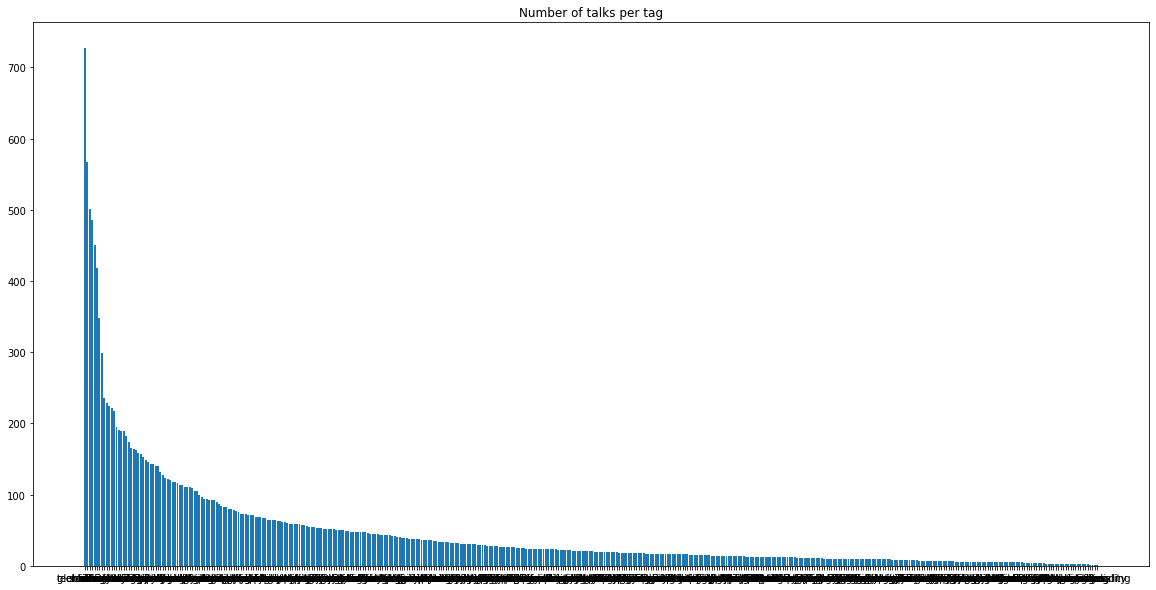

In [37]:
# plot the number of talks for each tag

fig = plt.figure(figsize=(20,10))
plt.bar(x='tag',height='count',data=tag_talk_df)
plt.title('Number of talks per tag')
plt.show()

In [33]:
# check the top 10 tags with most number of talks
tag_talk_df.iloc[:10,:2]

,tag,count
14,technology,727
12,science,567
11,global issues,501
2,culture,486
293,TEDx,450
54,design,418
25,business,348
16,entertainment,299
37,health,236
148,innovation,229


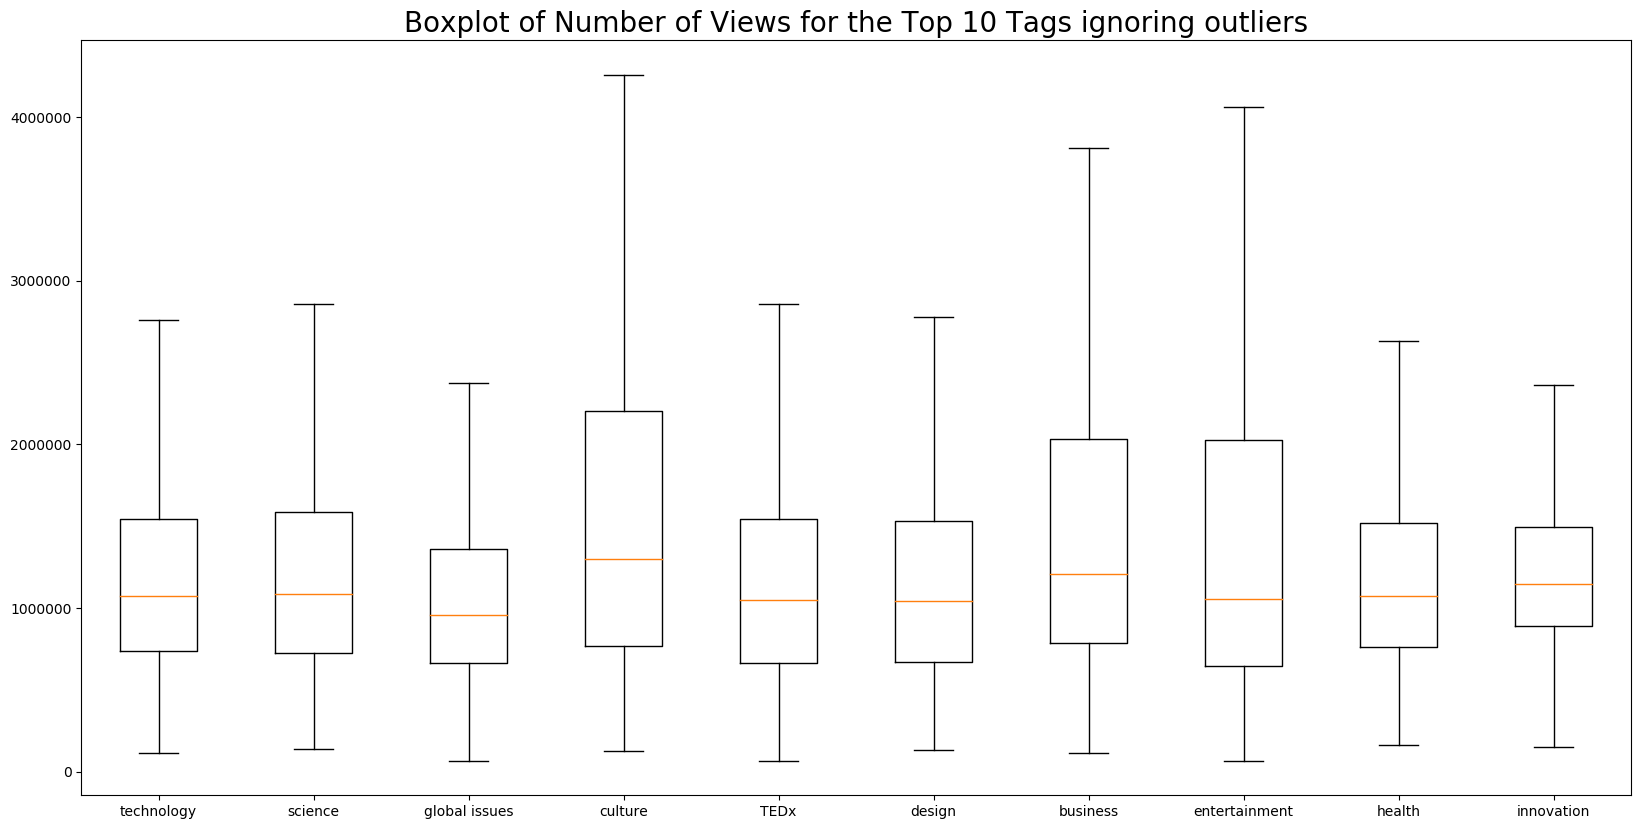

In [34]:
plt.figure(figsize=(20,10),dpi=100)
plt.boxplot(x='view',data=tag_talk_df.iloc[:10],showfliers=False,labels='tag')
plt.title("Boxplot of Number of Views for the Top 10 Tags ignoring outliers",fontsize=20)
plt.show()

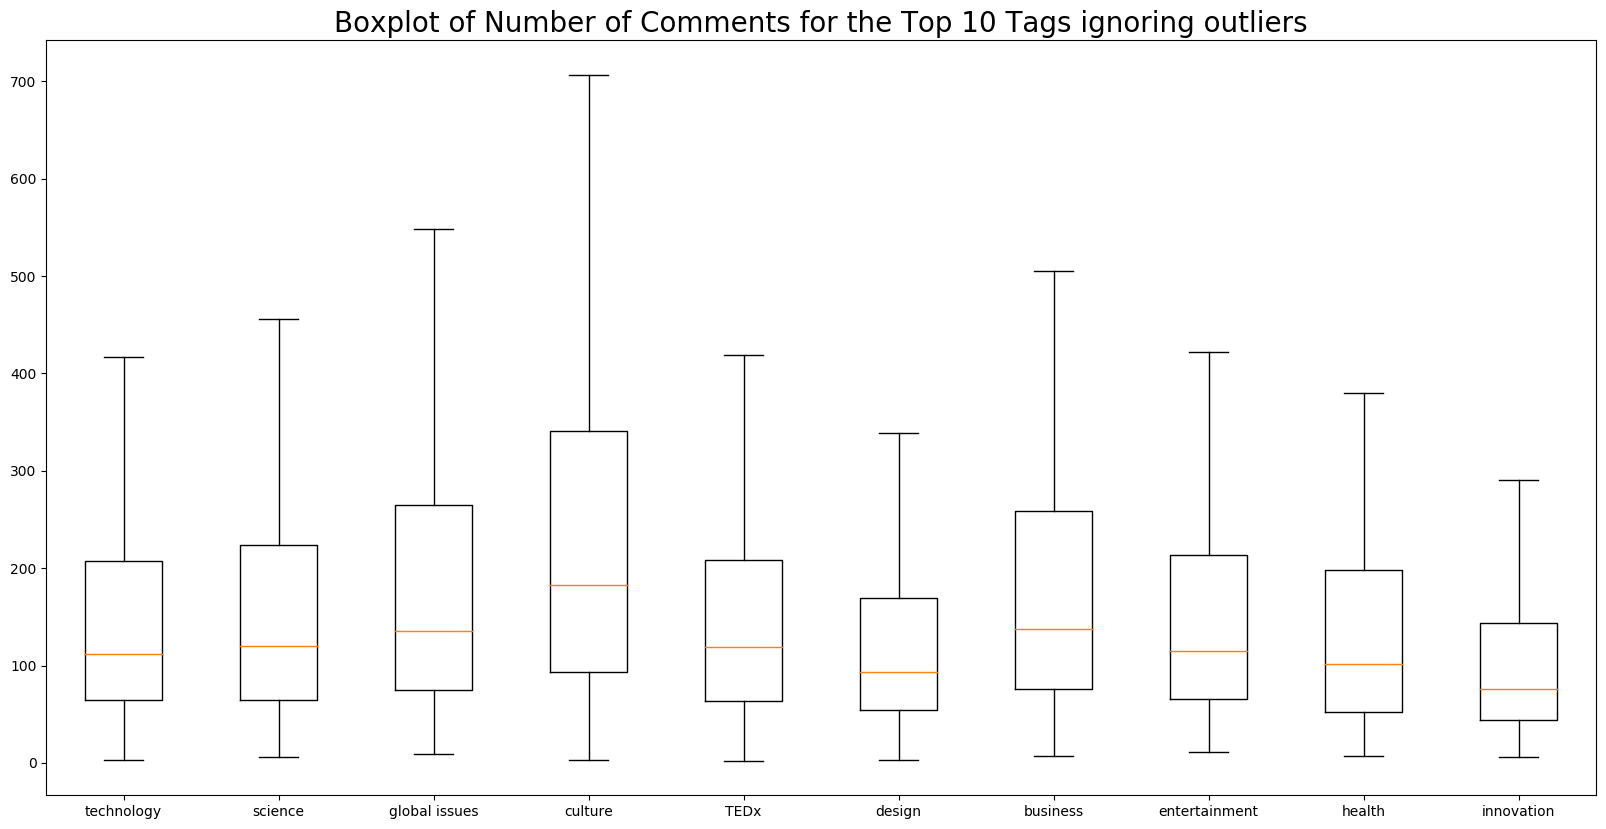

In [35]:
plt.figure(figsize=(20,10),dpi=100)
plt.boxplot(x='comment',data=tag_talk_df.iloc[:10],showfliers=False,labels='tag')
plt.title("Boxplot of Number of Comments for the Top 10 Tags ignoring outliers",fontsize=20)
plt.show()